# Challenge - Interactive map with Bokeh

![](https://images.unsplash.com/photo-1584931423298-c576fda54bd2?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

You are now a bit more familiar with Altair. It is time to explore Bokeh for interactive map visualization. Our aim will be to plot the city and coordinates of the cases in Senegal.

We will work with the same dataset as in the previous challenge, from https://raw.githubusercontent.com/maelfabien/COVID-19-Senegal/master/COVID_Senegal.csv.

In [16]:
# We made the imports for you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely import wkt
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, ColumnDataSource
import json
from bokeh.models import HoverTool

In [1]:
# TODO : load data

**Q1**: Compute the number of positive cases per city in Senegal

**Q2**: Try to enrich this information with Latitude and Longitude using the file `city_coordinates.csv`.

**Q3**: Using Geopandas (and the files provided), we will now load an interactive map of Senegal. The code is provided for you for this part.

> 📚 GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.

In [22]:
shapefile = 'input/ne_110m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf[gdf['country'] == "Senegal" ]

You can then print the polygon corresponding to the shape of the country.

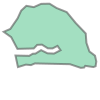

In [23]:
gdf['geometry'][51]

We then create a JSON grid out of the coordinates and format it for Bokeh.

In [10]:
grid_crs=gdf.crs
gdf_json = json.loads(gdf.to_json())
grid = json.dumps(gdf_json)
geosource = GeoJSONDataSource(geojson = grid)

**Q4**: Using Bokeh, plot the map of Senegal. You will need to use p.patches with geosource being the source. Make sure to render the chart in the notebook.

**Q5**: Delete the background of the image and the axis.

**Q6**: Now, add the information regarding the cases in Senegal contained in the dataset you previously built. Add the information of the number of cases on Hover using HoverTool. Plot the coordinates of the points using p.circle. Make the size of the dot reflect the number of positive cases.